<a href="https://colab.research.google.com/github/RodneyRibeiro/Dio-Desafios/blob/Desafios_Dio/API_FLASK_DESAFIO_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install flask_ngrok

In [ ]:
import pandas as pd
from flask_ngrok import run_with_ngrok
from flask import request,jsonify,Flask
import random as rk

In [ ]:
app = Flask(__name__)
run_with_ngrok(app)

In [ ]:
d = {
    "name" : "Rodney",
    "surname" : "Ribeiro",
    "idade" : 36
}

In [ ]:
@app.route("/")

def home():
  '''
  Função de teste
  '''
  return "<marquee><h3> TO CHECK INPUT ADD '/input' TO THE URL AND TO CHECK OUT PUT ADD '/output' TO THE URL.</h3><marquee>"

In [ ]:
@app.route("/input")

def input():
  return jsonify(d)

In [ ]:
@app.route('/output', methods=['GET','POST'])

def predJsonFlask():
  pred = rk.choice(["positive", "negative"])
  nd = d
  nd["prediction"]=pred
  return jsonify(nd)

  app.run()

# Nova seção

In [ ]:
import pandas as pnd

url = 'https://community.alteryx.com/pvsmt99345/attachments/pvsmt99345/weeklychallenge/109208/2/words.csv'
sf = pnd.read_csv(url)
sf.head()

,aa
0,aah
1,aahed
2,aahing
3,aahs
4,aal


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('aa').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

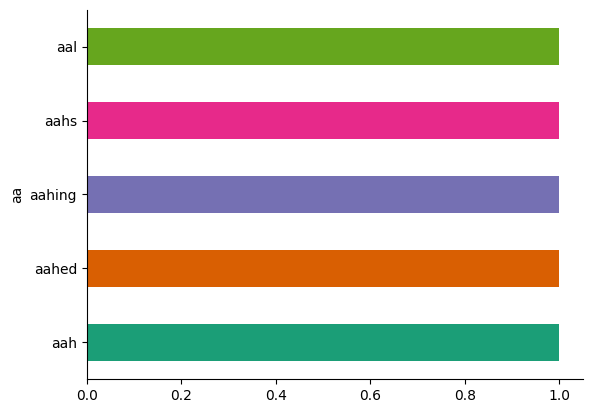

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('aa').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)